In [166]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
color = sns.color_palette()
import time

In [167]:
customer_example = pd.read_csv('customer_example.csv')

In [146]:
customer_example.head(5)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [131]:
customer_example.shape

(30, 2)

# K-mean model

1. load the data into pandas
2. build several models with different number of clusters
3. find the optimal number of clusters
4. interpret the result

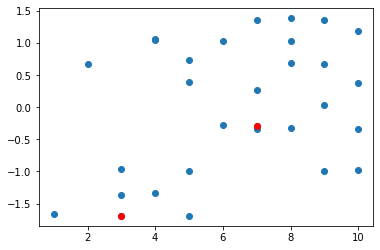

In [168]:
Centroids = (customer_example.sample(n=2))
plt.scatter(customer_example['Satisfaction'], customer_example['Loyalty'])
plt.scatter(Centroids['Satisfaction'], Centroids['Loyalty'], c='red')
plt.show()

In [169]:
from sklearn.preprocessing import StandardScaler
x = customer_example.values
scaler = StandardScaler()
scaler_customer = scaler.fit_transform(customer_example)
customer_example = pd.DataFrame(scaler_customer)

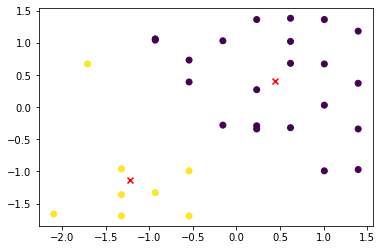

In [170]:
from sklearn.cluster import KMeans 
n_clusters=2
clf = KMeans(n_clusters=n_clusters)
clf.fit(customer_example)
y_kmeans = clf.fit_predict(customer_example)
labels = clf.labels_
centroids = clf.cluster_centers_
sse = clf.inertia_
customer_example['label'] = labels

plt.scatter(customer_example[0], customer_example[1], c=y_kmeans)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x')
plt.show()

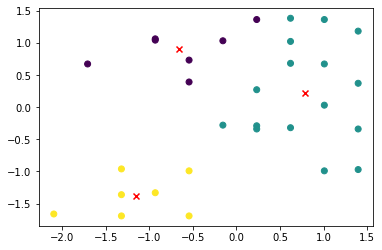

In [171]:
n_clusters=3
clf = KMeans(n_clusters=n_clusters)
clf.fit(customer_example)
y_kmeans = clf.fit_predict(customer_example)
labels = clf.labels_
centroids = clf.cluster_centers_
sse = clf.inertia_
customer_example['label'] = labels

plt.scatter(customer_example[0], customer_example[1], c=y_kmeans)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x')
plt.show()

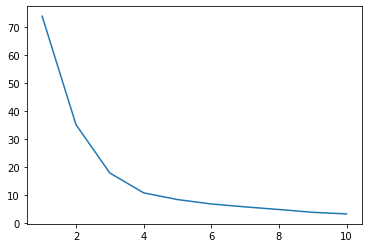

In [172]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customer_example)
    sse.append(kmeans.inertia_)
plt.plot(range(1,11),  sse)
plt.show()

In [173]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
kl.elbow

3

# Hierarchy clustering model 

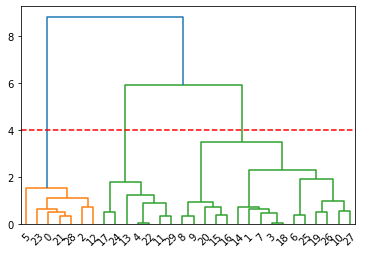

In [197]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

Z = sch.linkage(customer_example, method='ward')
dendrogram = sch.dendrogram(Z, labels=customer_example.index)
plt.axhline(y=4, color='r', linestyle='--')

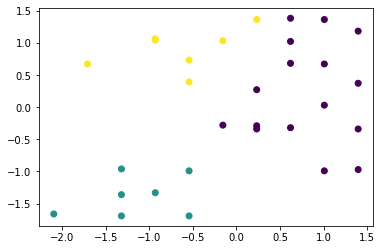

In [198]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(customer_example)

plt.scatter(customer_example[0],customer_example[1], c=cluster.labels_)